In [1]:
#importing libraries 

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
#read the CSV file
stc = pd.read_csv("HandestsSTC.csv")

In [3]:
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   CAL_DT            1048575 non-null  object
 1   MODEL_NAME        1048575 non-null  object
 2   BRAND_FULL_NAME   1048575 non-null  object
 3   BRAND_NAME        1048575 non-null  object
 4   VENDOR_NAME       1048575 non-null  object
 5   OS_NAME           1048575 non-null  object
 6   DEVICE_TYPE       1048575 non-null  object
 7   _2G_FLG           1048575 non-null  object
 8   _3G_FLG           1048575 non-null  object
 9   _4G_FLG           1048575 non-null  object
 10  WIFI_FLG          1048575 non-null  object
 11  BLUETOOTH_FLG     1048575 non-null  object
 12  TOUCH_SCREEN_FLG  1048575 non-null  object
 13  DUAL_SIM_FLG      1048575 non-null  object
 14  GENDER_TYPE_CD    939245 non-null   object
 15  AGE_B             1048575 non-null  object
 16  NATIONALITY_CD    

In [4]:
#check the null values
stc.isna().sum()

CAL_DT                   0
MODEL_NAME               0
BRAND_FULL_NAME          0
BRAND_NAME               0
VENDOR_NAME              0
OS_NAME                  0
DEVICE_TYPE              0
_2G_FLG                  0
_3G_FLG                  0
_4G_FLG                  0
WIFI_FLG                 0
BLUETOOTH_FLG            0
TOUCH_SCREEN_FLG         0
DUAL_SIM_FLG             0
GENDER_TYPE_CD      109330
AGE_B                    0
NATIONALITY_CD      122866
NATIONALITY_NAME    122642
SAUDI_NON_SAUDI        493
DEVICE_COUNT           489
dtype: int64

In [5]:
stc.describe()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,X2-00,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [6]:
stc.describe(exclude='number')

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,X2-00,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [7]:
#create a copy from the stc dataframe
stc_d=stc.copy()

In [8]:
#sum of dupliacated values
stc_d.duplicated().sum()

2293

In [9]:
#drop dupliacated values
stc_d.drop_duplicates(inplace=True)

In [10]:
stc_d.duplicated().sum()

0

In [11]:
#drop null values
stc_d.dropna(axis=0,inplace=True)

In [12]:
#check null values for each column
stc_d.isna().sum()

CAL_DT              0
MODEL_NAME          0
BRAND_FULL_NAME     0
BRAND_NAME          0
VENDOR_NAME         0
OS_NAME             0
DEVICE_TYPE         0
_2G_FLG             0
_3G_FLG             0
_4G_FLG             0
WIFI_FLG            0
BLUETOOTH_FLG       0
TOUCH_SCREEN_FLG    0
DUAL_SIM_FLG        0
GENDER_TYPE_CD      0
AGE_B               0
NATIONALITY_CD      0
NATIONALITY_NAME    0
SAUDI_NON_SAUDI     0
DEVICE_COUNT        0
dtype: int64

In [13]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CAL_DT            836526 non-null  object
 1   MODEL_NAME        836526 non-null  object
 2   BRAND_FULL_NAME   836526 non-null  object
 3   BRAND_NAME        836526 non-null  object
 4   VENDOR_NAME       836526 non-null  object
 5   OS_NAME           836526 non-null  object
 6   DEVICE_TYPE       836526 non-null  object
 7   _2G_FLG           836526 non-null  object
 8   _3G_FLG           836526 non-null  object
 9   _4G_FLG           836526 non-null  object
 10  WIFI_FLG          836526 non-null  object
 11  BLUETOOTH_FLG     836526 non-null  object
 12  TOUCH_SCREEN_FLG  836526 non-null  object
 13  DUAL_SIM_FLG      836526 non-null  object
 14  GENDER_TYPE_CD    836526 non-null  object
 15  AGE_B             836526 non-null  object
 16  NATIONALITY_CD    836526 non-null  ob

## EDA for Catogrical Data

Text(0.5, 0, 'Device type')

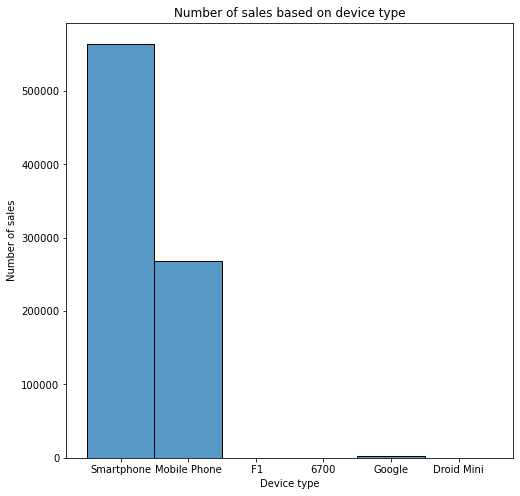

In [14]:
#Histogram chart ---> Number of sales based on device type
plt.figure(figsize=(8,8))
sns.histplot(data=stc_d, x='DEVICE_TYPE')
plt.title("Number of sales based on device type")
plt.ylabel("Number of sales")
plt.xlabel("Device type")

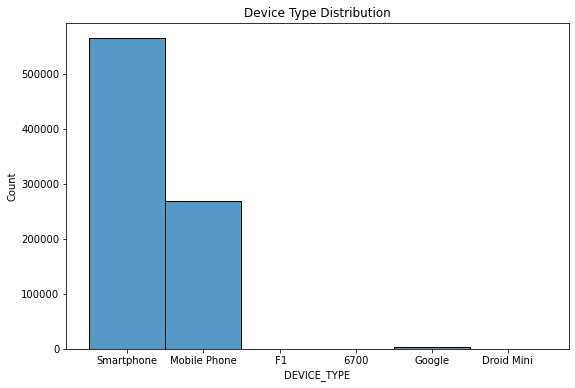

In [15]:
#Histogram chart --> Device Type Distribution
plt.figure(figsize=(9,6))
sns.histplot(data=stc_d, x="DEVICE_TYPE", palette='rainbow')
plt.title('Device Type Distribution')
plt.show()

Text(0.5, 0, 'Counts of Devices')

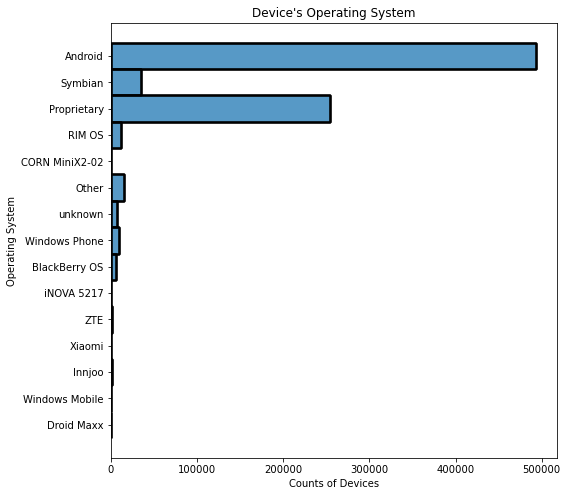

In [16]:
# Histogram chart ---> Device's Operating System
plt.figure(figsize=(8,8))
sns.histplot(data=stc_d, y='OS_NAME')
plt.title("Device's Operating System")
plt.ylabel("Operating System")
plt.xlabel("Counts of Devices")

In [17]:
# finding number of devices for each brand 
b = stc_d['BRAND_NAME'].unique()
d = []
for i in b:
    num_b = i
    c = stc_d['BRAND_NAME'] == i
    s =c.sum() 
    d.append((num_b,s))
d = pd.DataFrame(d)
d

,0,1
0,HTC,42968
1,Nokia,203251
2,ZTE,2209
3,QMobile,2836
4,Honeywell,512
...,...,...
198,Rocktel,1
199,Reeder,7
200,Droid Mini,19
201,AGM,1


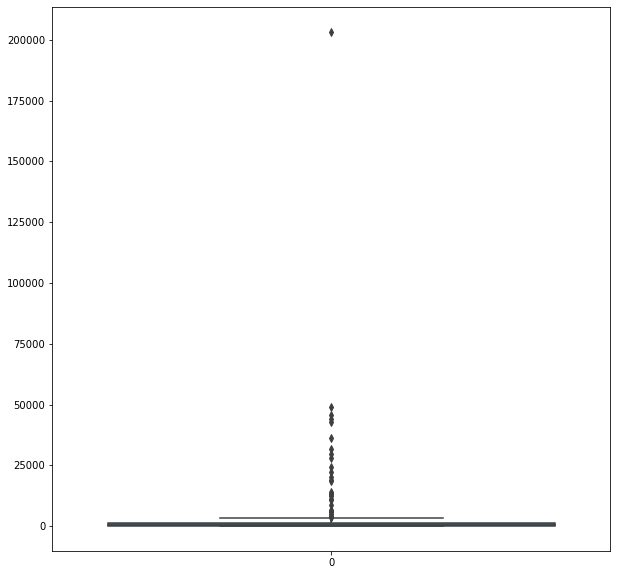

In [18]:
# box plot --> devives count
plt.figure(figsize=(10,10))
sns.boxplot(data = d[1]) ;

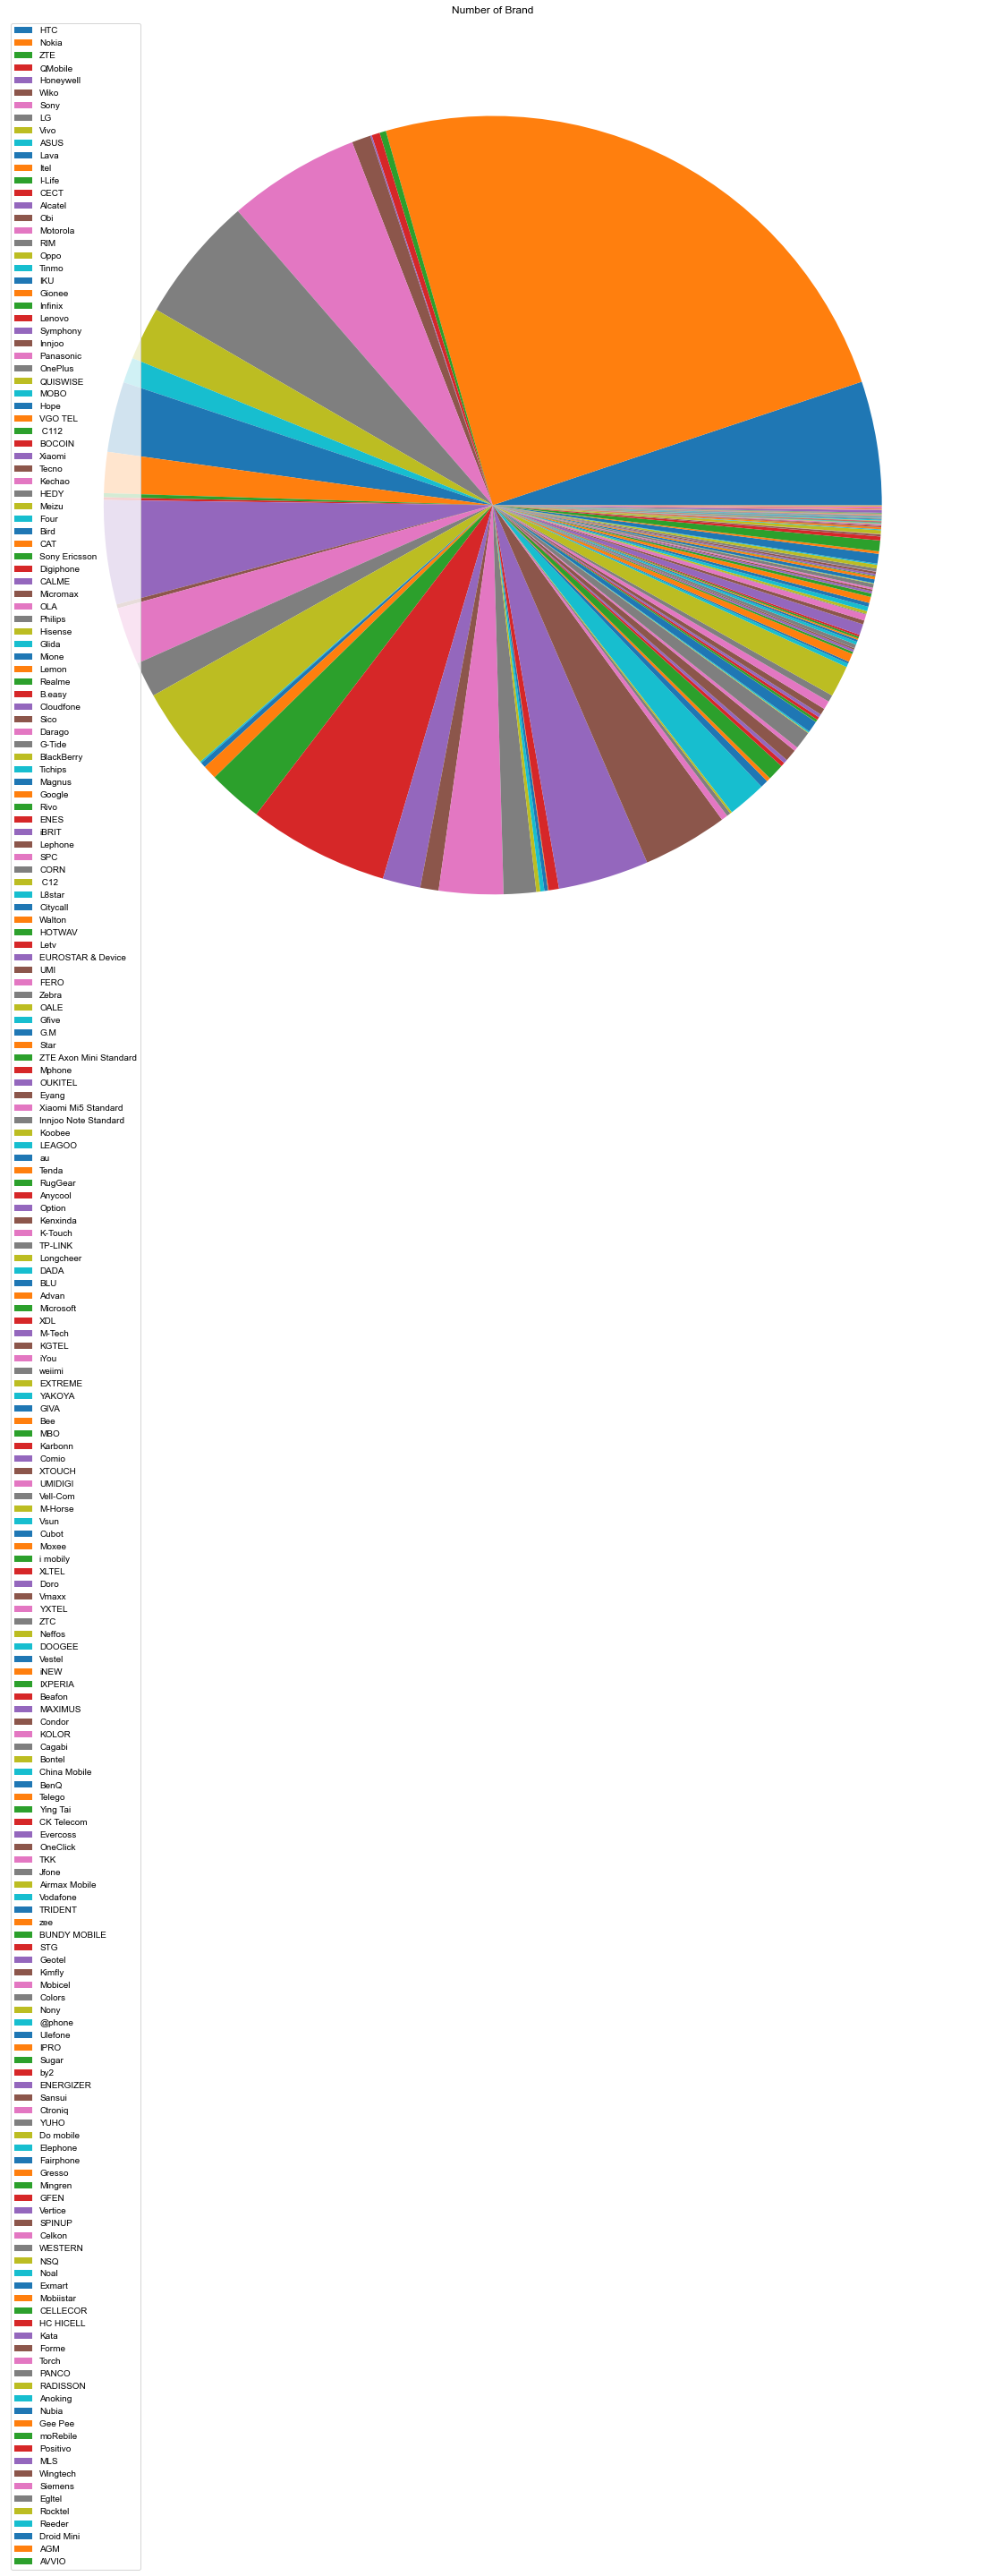

In [19]:
# pie chart --> Brands and number of devicese 
plt.figure(figsize= (20,20)) # SIZE
plt.title('Number of Brand' )
label = d[0]
p = plt.pie(d[1]);
plt.legend(label, loc="best" , prop = {'size' :10}); # legend
sns.set()
sns.color_palette('pastel');

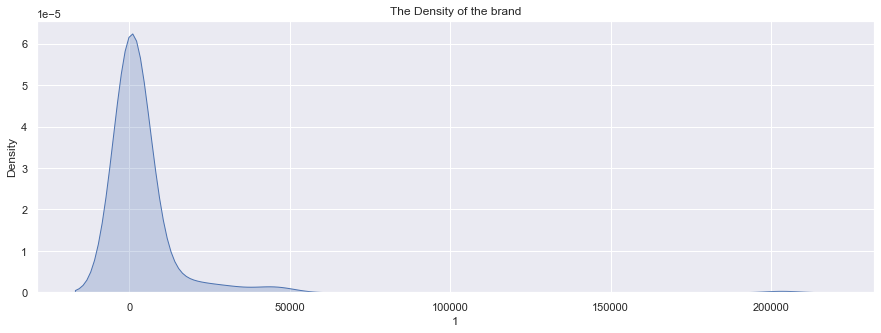

In [20]:
# kdeplot -->  Density of the brand
plt.figure(figsize=(15,5));
plt.title('The Density of the brand');
sns.kdeplot(data = d[1] , shade = True);

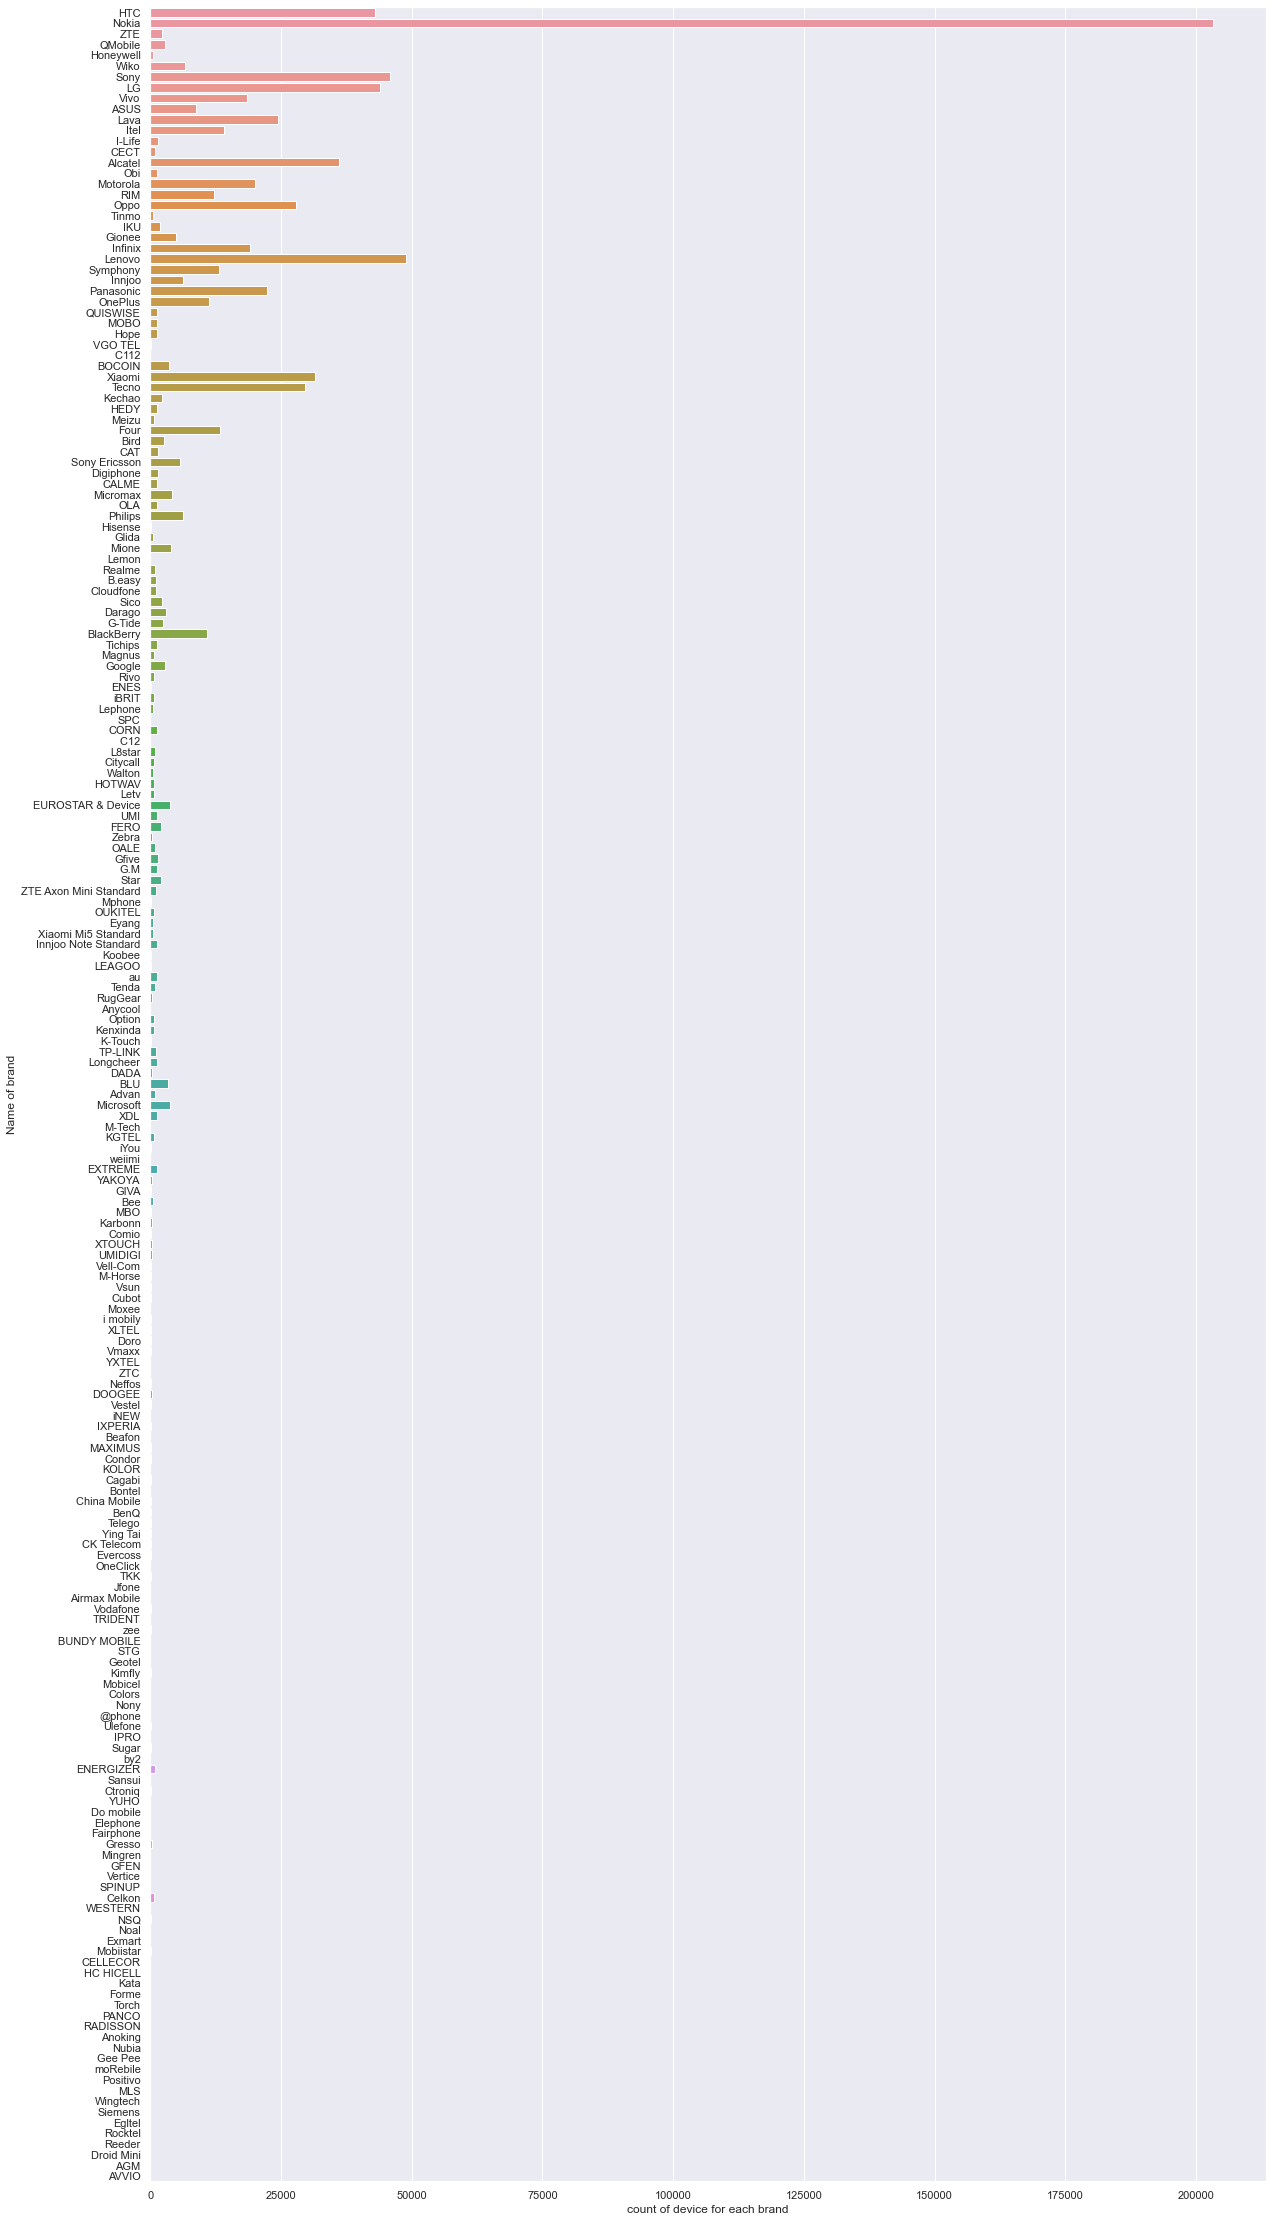

In [21]:
# bar plot --> devices for each brand
plt.figure(figsize=(20,40));
sns.barplot(x=d[1], y=d[0], data=d);
plt.ylabel('Name of brand');
plt.xlabel('count of device for each brand');

In [22]:
# finding number of devices for each VENDOR 
v = stc_d['VENDOR_NAME'].unique()
n = []
for i in v:
    num_b = i
    c = stc_d['VENDOR_NAME'] == i
    s =c.sum() 
    n.append((num_b,s))
n = pd.DataFrame(n)
n

,0,1
0,Google,493199
1,Nokia,149981
2,Symbian LTD,29922
3,CECT,936
4,Alcatel,12612
...,...,...
108,Positivo,1
109,Siemens,1
110,EGLTEL,2
111,Motorola Droid Ultra,19


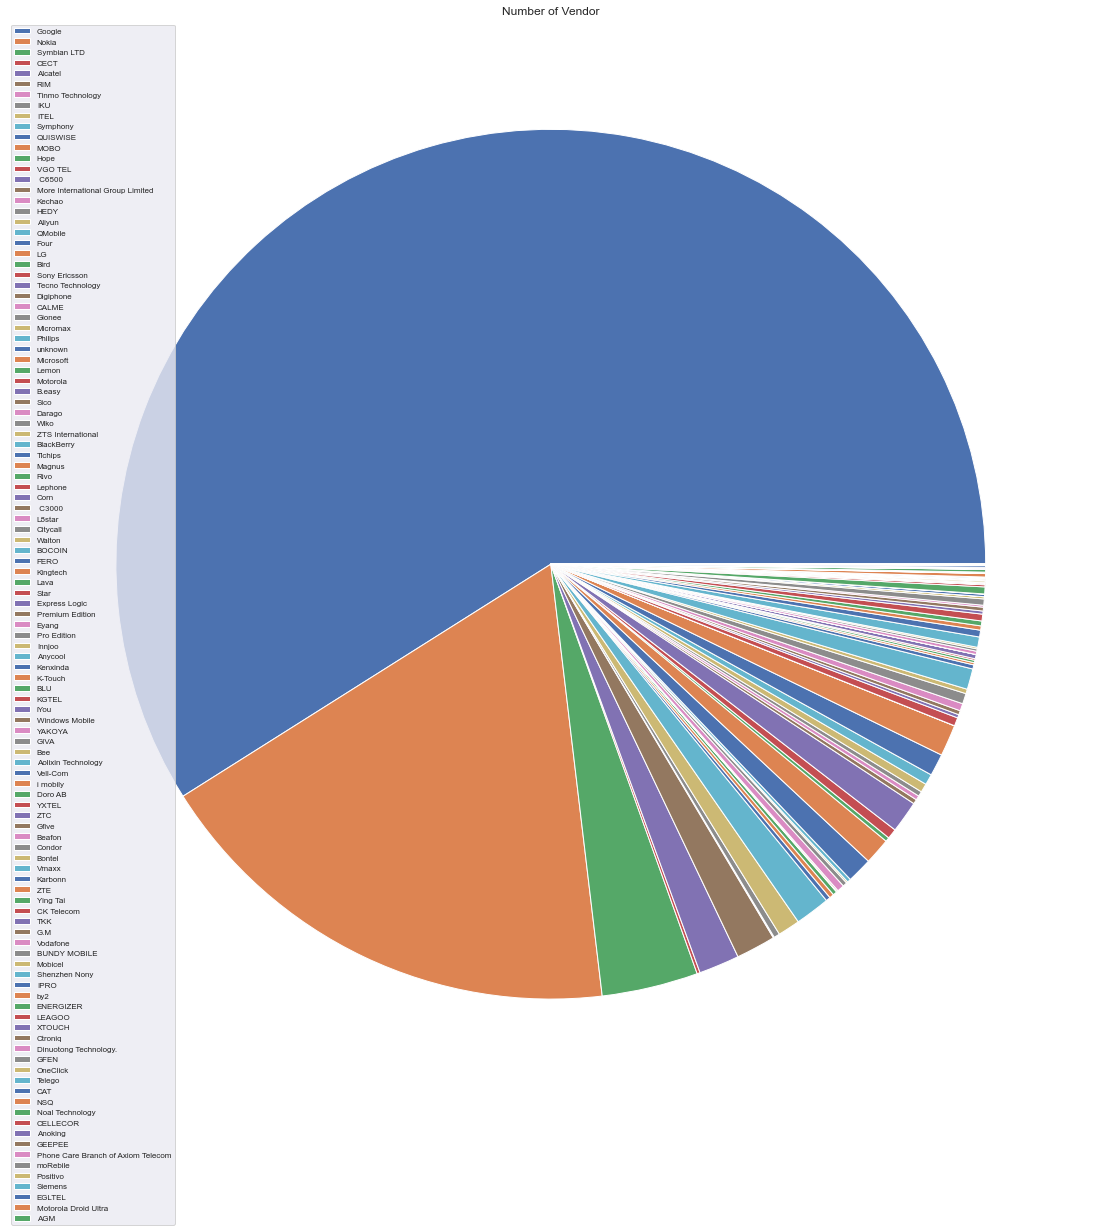

In [23]:
# pie chart --> Number of Vendors
plt.figure(figsize= (20,20)) # SIZE
plt.title('Number of Vendor' )
label = n[0]
p = plt.pie(n[1]);
plt.legend(label, loc="best" , prop = {'size' :8}); # legend
sns.set()
sns.color_palette('pastel');

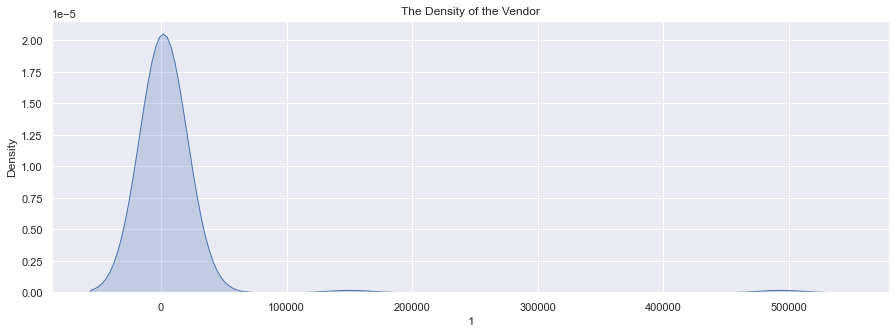

In [24]:
# kdeplot --> Density of the Vendor
plt.figure(figsize=(15,5));
plt.title('The Density of the Vendor');
sns.kdeplot(data = n[1] , shade = True);

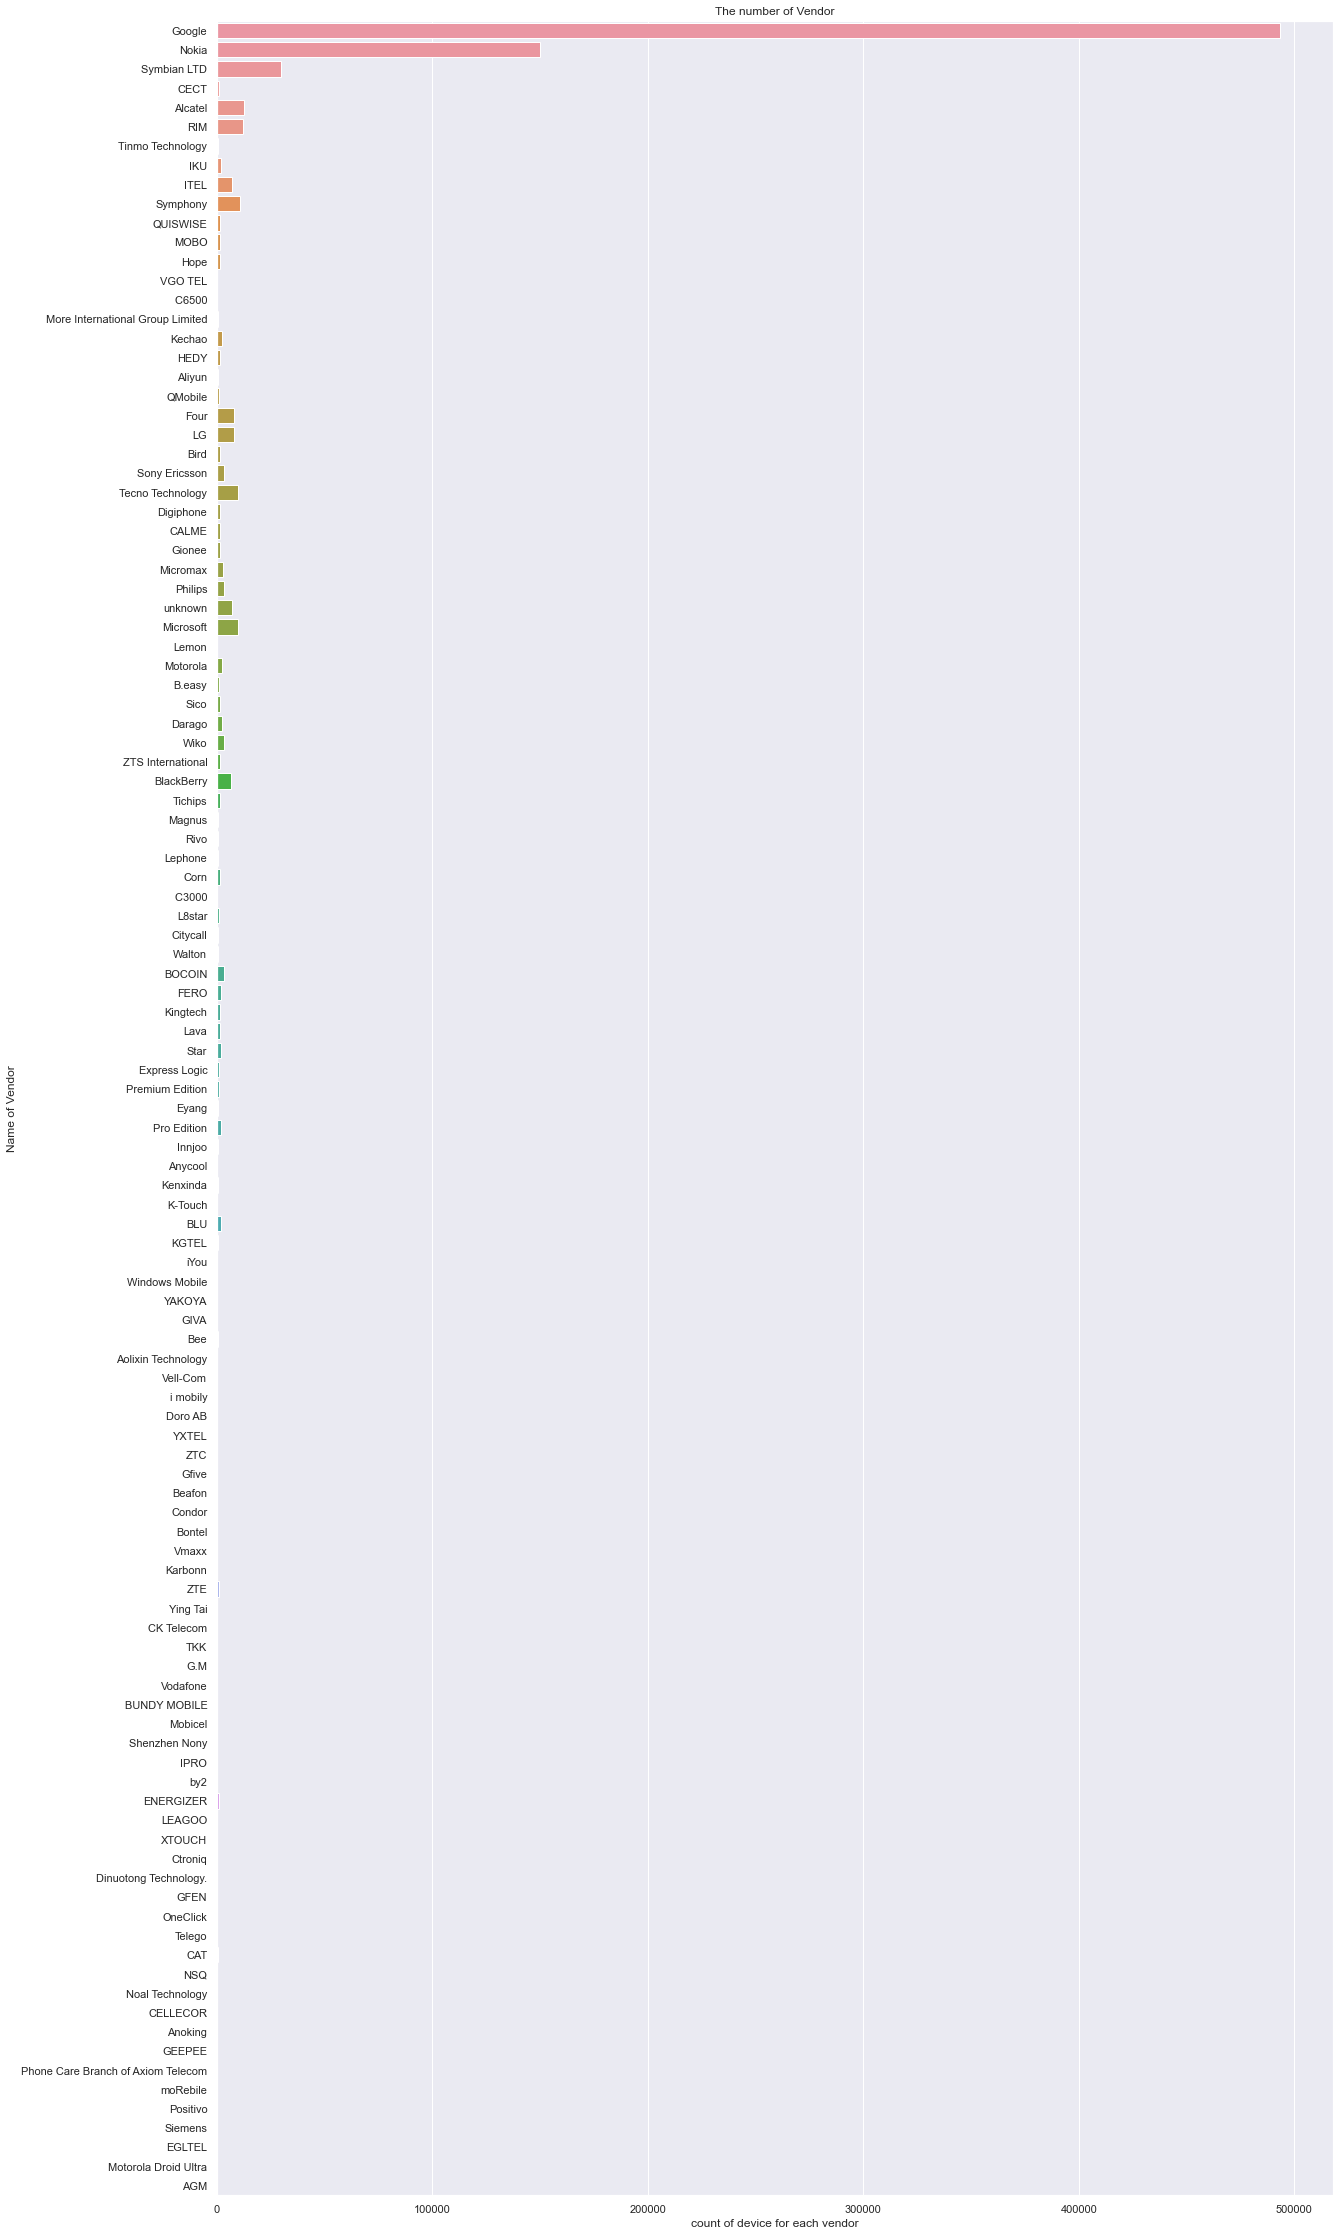

In [25]:
# bar plot --> count of device for each vendor
plt.figure(figsize=(20,40));
plt.title('The number of Vendor')
sns.barplot(x=n[1], y=n[0], data=d);
plt.ylabel('Name of Vendor');
plt.xlabel('count of device for each vendor');

In [26]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CAL_DT            836526 non-null  object
 1   MODEL_NAME        836526 non-null  object
 2   BRAND_FULL_NAME   836526 non-null  object
 3   BRAND_NAME        836526 non-null  object
 4   VENDOR_NAME       836526 non-null  object
 5   OS_NAME           836526 non-null  object
 6   DEVICE_TYPE       836526 non-null  object
 7   _2G_FLG           836526 non-null  object
 8   _3G_FLG           836526 non-null  object
 9   _4G_FLG           836526 non-null  object
 10  WIFI_FLG          836526 non-null  object
 11  BLUETOOTH_FLG     836526 non-null  object
 12  TOUCH_SCREEN_FLG  836526 non-null  object
 13  DUAL_SIM_FLG      836526 non-null  object
 14  GENDER_TYPE_CD    836526 non-null  object
 15  AGE_B             836526 non-null  object
 16  NATIONALITY_CD    836526 non-null  ob

In [27]:
#count values for each column 
for elem in stc_d.columns[1:]:
    print(stc_d[elem].value_counts())
    print("\n")

K7 SPARK        1528
6700 Classic    1523
X2-00           1493
1110            1491
C7-00           1484
                ... 
Droid Ultra       19
Mi A2 Lite        15
5217              11
x1                10
P8                 7
Name: MODEL_NAME, Length: 825, dtype: int64


Pro Edition           1940
Tecno K7 SPARK        1528
Nokia 6700 Classic    1523
Nokia X2-00           1493
Nokia 1110            1491
                      ... 
Rocktel W4               1
Siemens S4               1
Positivo P70             1
AVVIO L800               1
AGM M2                   1
Name: BRAND_FULL_NAME, Length: 1058, dtype: int64


Nokia       203251
Lenovo       48873
Sony         45870
LG           43986
HTC          42968
             ...  
Positivo         1
Anoking          1
Siemens          1
Rocktel          1
AGM              1
Name: BRAND_NAME, Length: 203, dtype: int64


Google         493199
Nokia          149981
Symbian LTD     29922
Alcatel         12612
RIM             12275
         

## Drop Irrelevant Data

In [28]:
# drop irrelevant data in GENDER_TYPE_CD column 
stc_d.drop(stc_d[(stc_d['GENDER_TYPE_CD']=='Y') |(stc_d['GENDER_TYPE_CD']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [29]:
# drop irrelevant data in AGE_B column 
stc_d.drop(stc_d[(stc_d['AGE_B']=='Y') | (stc_d['AGE_B']== 'N') | (stc_d['AGE_B']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [30]:
# drop irrelevant data in NATIONALITY_CD column 
stc_d.drop(stc_d[(stc_d['NATIONALITY_CD']=='Female') | (stc_d['AGE_B']== 'N') | (stc_d['NATIONALITY_CD']== 'Male')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [31]:
# drop irrelevant data in NATIONALITY_NAME column 
stc_d.drop(stc_d[(stc_d['NATIONALITY_NAME']=='18-25') | (stc_d['NATIONALITY_NAME']== '<18  ') | (stc_d['NATIONALITY_NAME']== 'N') | (stc_d['NATIONALITY_NAME']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [32]:
# drop irrelevant data in SAUDI_NON_SAUDI column 
stc_d.drop(stc_d[(stc_d['SAUDI_NON_SAUDI']=='Male') | (stc_d['SAUDI_NON_SAUDI']== 'Female') | (stc_d['SAUDI_NON_SAUDI']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [33]:
# drop irrelevant data in CAL_DT column 
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"]).dt.strftime('%Y')

In [34]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21


### Drop Unuseful columns

In [35]:
# Drop BRAND_FULL_NAME column
stc_d.drop(columns="BRAND_FULL_NAME",axis=1,inplace=True)

In [36]:
# Drop NATIONALITY_CD column
stc_d.drop(columns="NATIONALITY_CD",axis=1,inplace=True)

### Change Datatype 

In [37]:
# change the datatype of CAL_DT column to date datatype
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"])

In [38]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

In [39]:
# change the datatype of DEVICE_COUNT column to int datatype
stc_d["DEVICE_COUNT"]=stc_d["DEVICE_COUNT"].astype(str).astype(int)

In [40]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

### Label Encoder

In [41]:
# LabelEncoder
le = preprocessing.LabelEncoder()
stc_d["2G_FLG"]=le.fit_transform(stc_d["_2G_FLG"])
stc_d["3G_FLG"]=le.fit_transform(stc_d["_3G_FLG"])
stc_d["4G_FLG"]=le.fit_transform(stc_d["_4G_FLG"])
stc_d["WIFI"]=le.fit_transform(stc_d["WIFI_FLG"])
stc_d["BLUETOOTH"]=le.fit_transform(stc_d["BLUETOOTH_FLG"])
stc_d["TOUCH_SCREEN"]=le.fit_transform(stc_d["TOUCH_SCREEN_FLG"])
stc_d["DUAL_SIM"]=le.fit_transform(stc_d["DUAL_SIM_FLG"])
stc_d["GENDER"]=le.fit_transform(stc_d["GENDER_TYPE_CD"])
stc_d["MODEL"]=le.fit_transform(stc_d["MODEL_NAME"])
stc_d["BRAND"]=le.fit_transform(stc_d["BRAND_NAME"])
stc_d["VENDOR"]=le.fit_transform(stc_d["VENDOR_NAME"])
stc_d["OS"]=le.fit_transform(stc_d["OS_NAME"])
stc_d["DEVICE"]=le.fit_transform(stc_d["DEVICE_TYPE"])
stc_d["AGE"]=le.fit_transform(stc_d["AGE_B"])
stc_d["NATIONALITY"]=le.fit_transform(stc_d["NATIONALITY_NAME"])
stc_d["SAUDI"]=le.fit_transform(stc_d["SAUDI_NON_SAUDI"])

In [42]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,...,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,2019-01-01,One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,1,1,510,68,40,0,1,2,168,0
3,2019-01-01,C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,...,0,1,244,118,68,5,1,0,16,0
5,2020-01-01,Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,...,1,0,231,186,40,0,1,4,88,0
6,2019-01-01,i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,...,1,1,794,133,40,0,1,2,62,0
8,2019-01-01,One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,0,1,488,68,40,0,1,1,173,0


In [43]:
stc_d.drop(columns="_4G_FLG",axis=1,inplace=True)
stc_d.drop(columns="WIFI_FLG",axis=1,inplace=True)
stc_d.drop(columns="MODEL_NAME",axis=1,inplace=True)
stc_d.drop(columns="OS_NAME",axis=1,inplace=True)
stc_d.drop(columns="VENDOR_NAME",axis=1,inplace=True)
stc_d.drop(columns="BRAND_NAME",axis=1,inplace=True)
stc_d.drop(columns="DEVICE_TYPE",axis=1,inplace=True)
stc_d.drop(columns="SAUDI_NON_SAUDI",axis=1,inplace=True)
stc_d.drop(columns="NATIONALITY_NAME",axis=1,inplace=True)
stc_d.drop(columns="AGE_B",axis=1,inplace=True)
stc_d.drop(columns="GENDER_TYPE_CD",axis=1,inplace=True)
stc_d.drop(columns="DUAL_SIM_FLG",axis=1,inplace=True)
stc_d.drop(columns="TOUCH_SCREEN_FLG",axis=1,inplace=True)
stc_d.drop(columns="BLUETOOTH_FLG",axis=1,inplace=True)
stc_d.drop(columns="_2G_FLG",axis=1,inplace=True)
stc_d.drop(columns="_3G_FLG",axis=1,inplace=True)
stc_d.drop(columns="CAL_DT",axis=1,inplace=True)

In [44]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   DEVICE_COUNT  714023 non-null  int32
 1   2G_FLG        714023 non-null  int32
 2   3G_FLG        714023 non-null  int32
 3   4G_FLG        714023 non-null  int32
 4   WIFI          714023 non-null  int32
 5   BLUETOOTH     714023 non-null  int32
 6   TOUCH_SCREEN  714023 non-null  int32
 7   DUAL_SIM      714023 non-null  int32
 8   GENDER        714023 non-null  int32
 9   MODEL         714023 non-null  int32
 10  BRAND         714023 non-null  int32
 11  VENDOR        714023 non-null  int32
 12  OS            714023 non-null  int32
 13  DEVICE        714023 non-null  int32
 14  AGE           714023 non-null  int32
 15  NATIONALITY   714023 non-null  int32
 16  SAUDI         714023 non-null  int32
dtypes: int32(17)
memory usage: 71.8 MB


In [45]:
stc_d.head()

,DEVICE_COUNT,2G_FLG,3G_FLG,4G_FLG,WIFI,BLUETOOTH,TOUCH_SCREEN,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,9,1,1,1,1,1,1,1,1,510,68,40,0,1,2,168,0
3,2,1,1,0,1,1,1,0,1,244,118,68,5,1,0,16,0
5,1,1,1,1,1,1,1,1,0,231,186,40,0,1,4,88,0
6,1,1,1,0,1,1,1,1,1,794,133,40,0,1,2,62,0
8,21,1,1,1,1,1,1,0,1,488,68,40,0,1,1,173,0


## EDA for Numrical Data

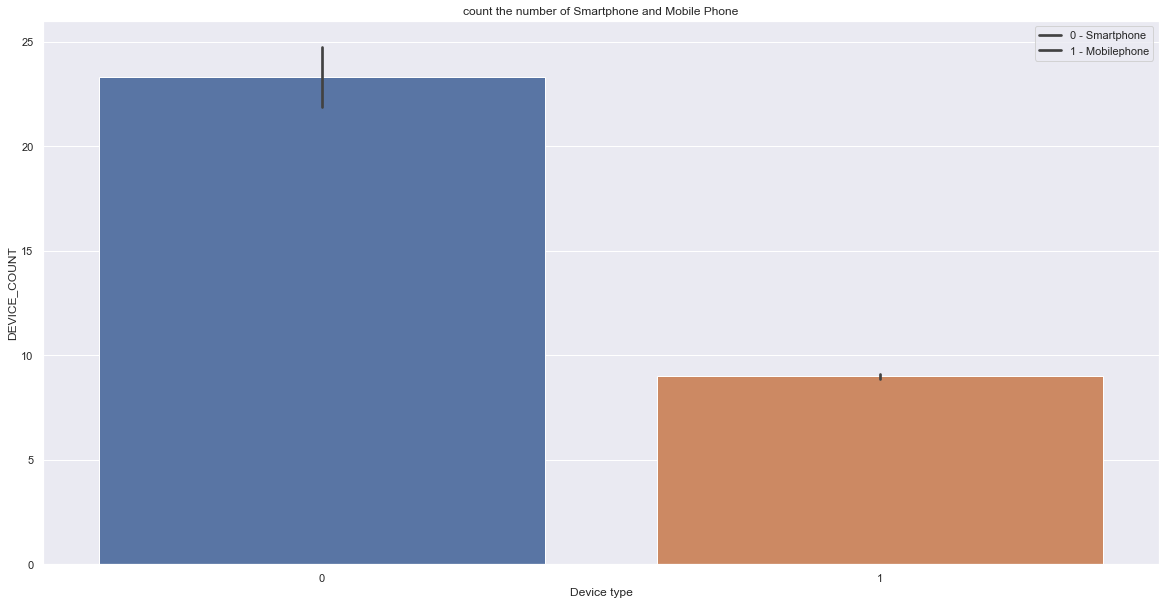

In [46]:
#barplot for --> Smartphone and Mobile Phone
plt.figure(figsize= (20,10)) # size
plt.title('count the number of Smartphone and Mobile Phone')# title 
sns.barplot( x =stc_d['DEVICE'],  y = stc_d['DEVICE_COUNT']);
plt.xlabel('Device type');
plt.legend(['0 - Smartphone' , '1 - Mobilephone']);

In [47]:
# assigning varibles for the sum of 2G_FLG', 3G_FLG' , and 4G_FLG' .
num_2 = (stc_d['2G_FLG'] == 1 ).sum()
num_3 = (stc_d['3G_FLG'] == 1 ).sum()
num_4 = (stc_d['4G_FLG'] == 1 ).sum()

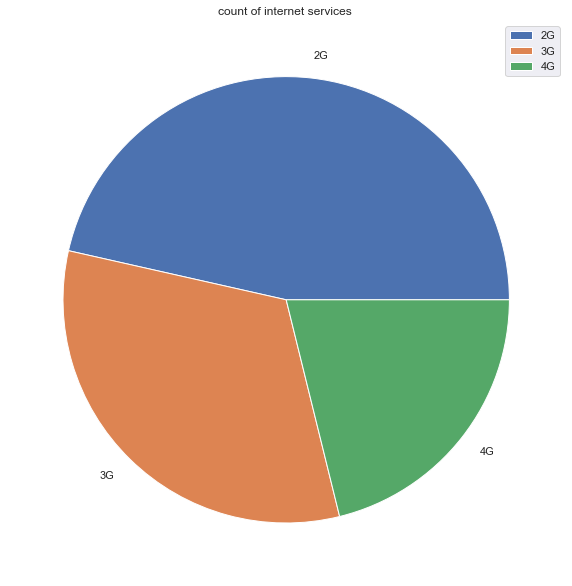

In [48]:
# Pie chart --> count of internet services
plt.figure(figsize= (10,20)) # SIZE
plt.title('count of internet services ') # title
num = [num_2 , num_3 , num_4] 
label = ['2G' , '3G' , '4G'] 
plt.pie(num , labels= label);
plt.legend(); # legend
sns.set()
sns.color_palette('pastel');

In [49]:
# divide the gender column into 2 categories (for plotting purpose)
m = (stc_d['GENDER'] == 1 ).sum()
f = (stc_d['GENDER'] == 0 ).sum()

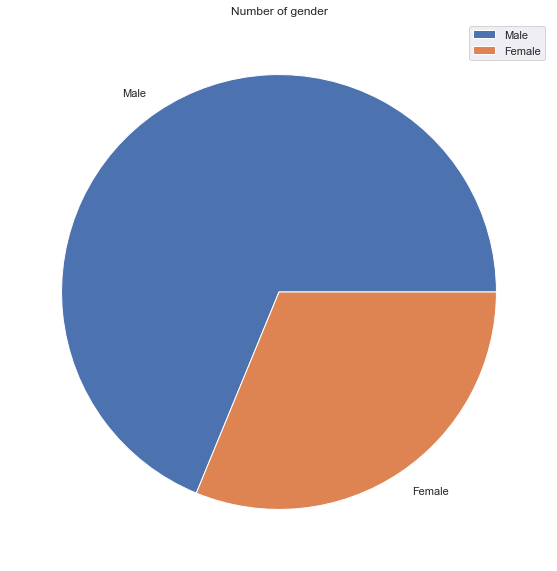

In [50]:
# pie chart ---> gender
plt.figure(figsize= (10,10)) # SIZE
plt.title('Number of gender' ) # title
num_gen = [m , f ] # number of man and female
label = ['Male' , 'Female'] 
plt.pie(num_gen , labels= label);
plt.legend(); # legend
sns.set()
sns.color_palette('pastel');

In [51]:
# divide the age column into 5 categories (for plotting purpose)
a0 = (stc_d['AGE'] == 0).sum()
a1=(stc_d['AGE'] == 1).sum()
a2 = (stc_d['AGE'] == 2).sum()
a3 = (stc_d['AGE'] == 3).sum()
a4 = (stc_d['AGE'] == 4).sum()
l = ['<18' , '18-25' , '26-35','36-55','>55']
a = [a0 , a1 , a2 , a3 , a4 ]

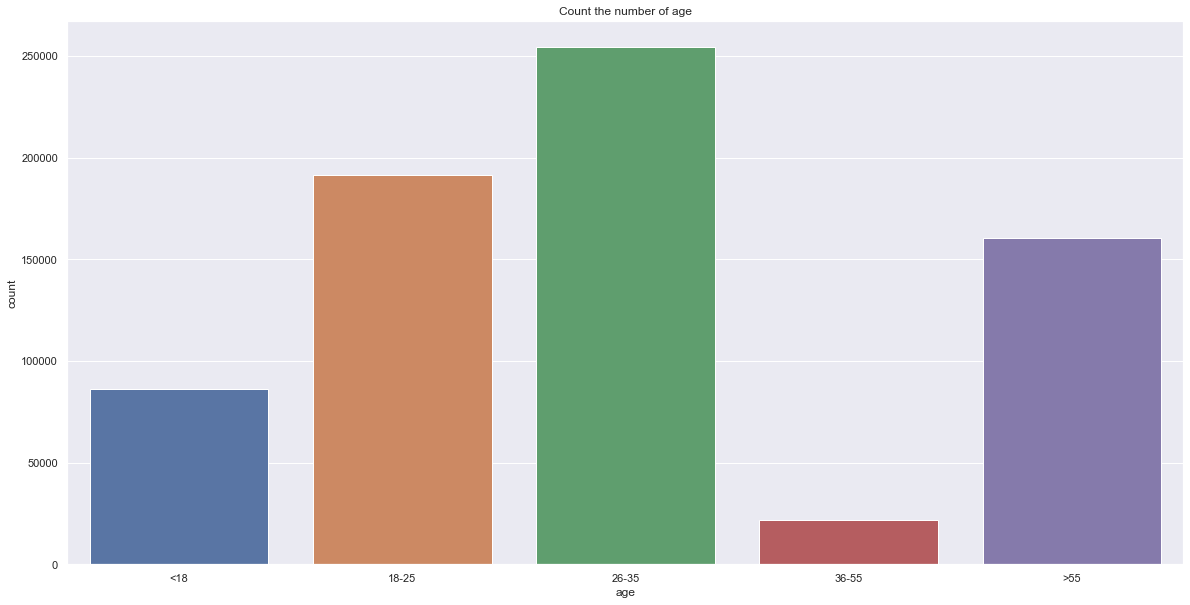

In [52]:
# barplot --> Count the number of age
plt.figure(figsize=(20,10));
plt.title('Count the number of age');
plt.xlabel('age');
plt.ylabel('count');
sns.barplot(data=stc_d, x=l, y=a);

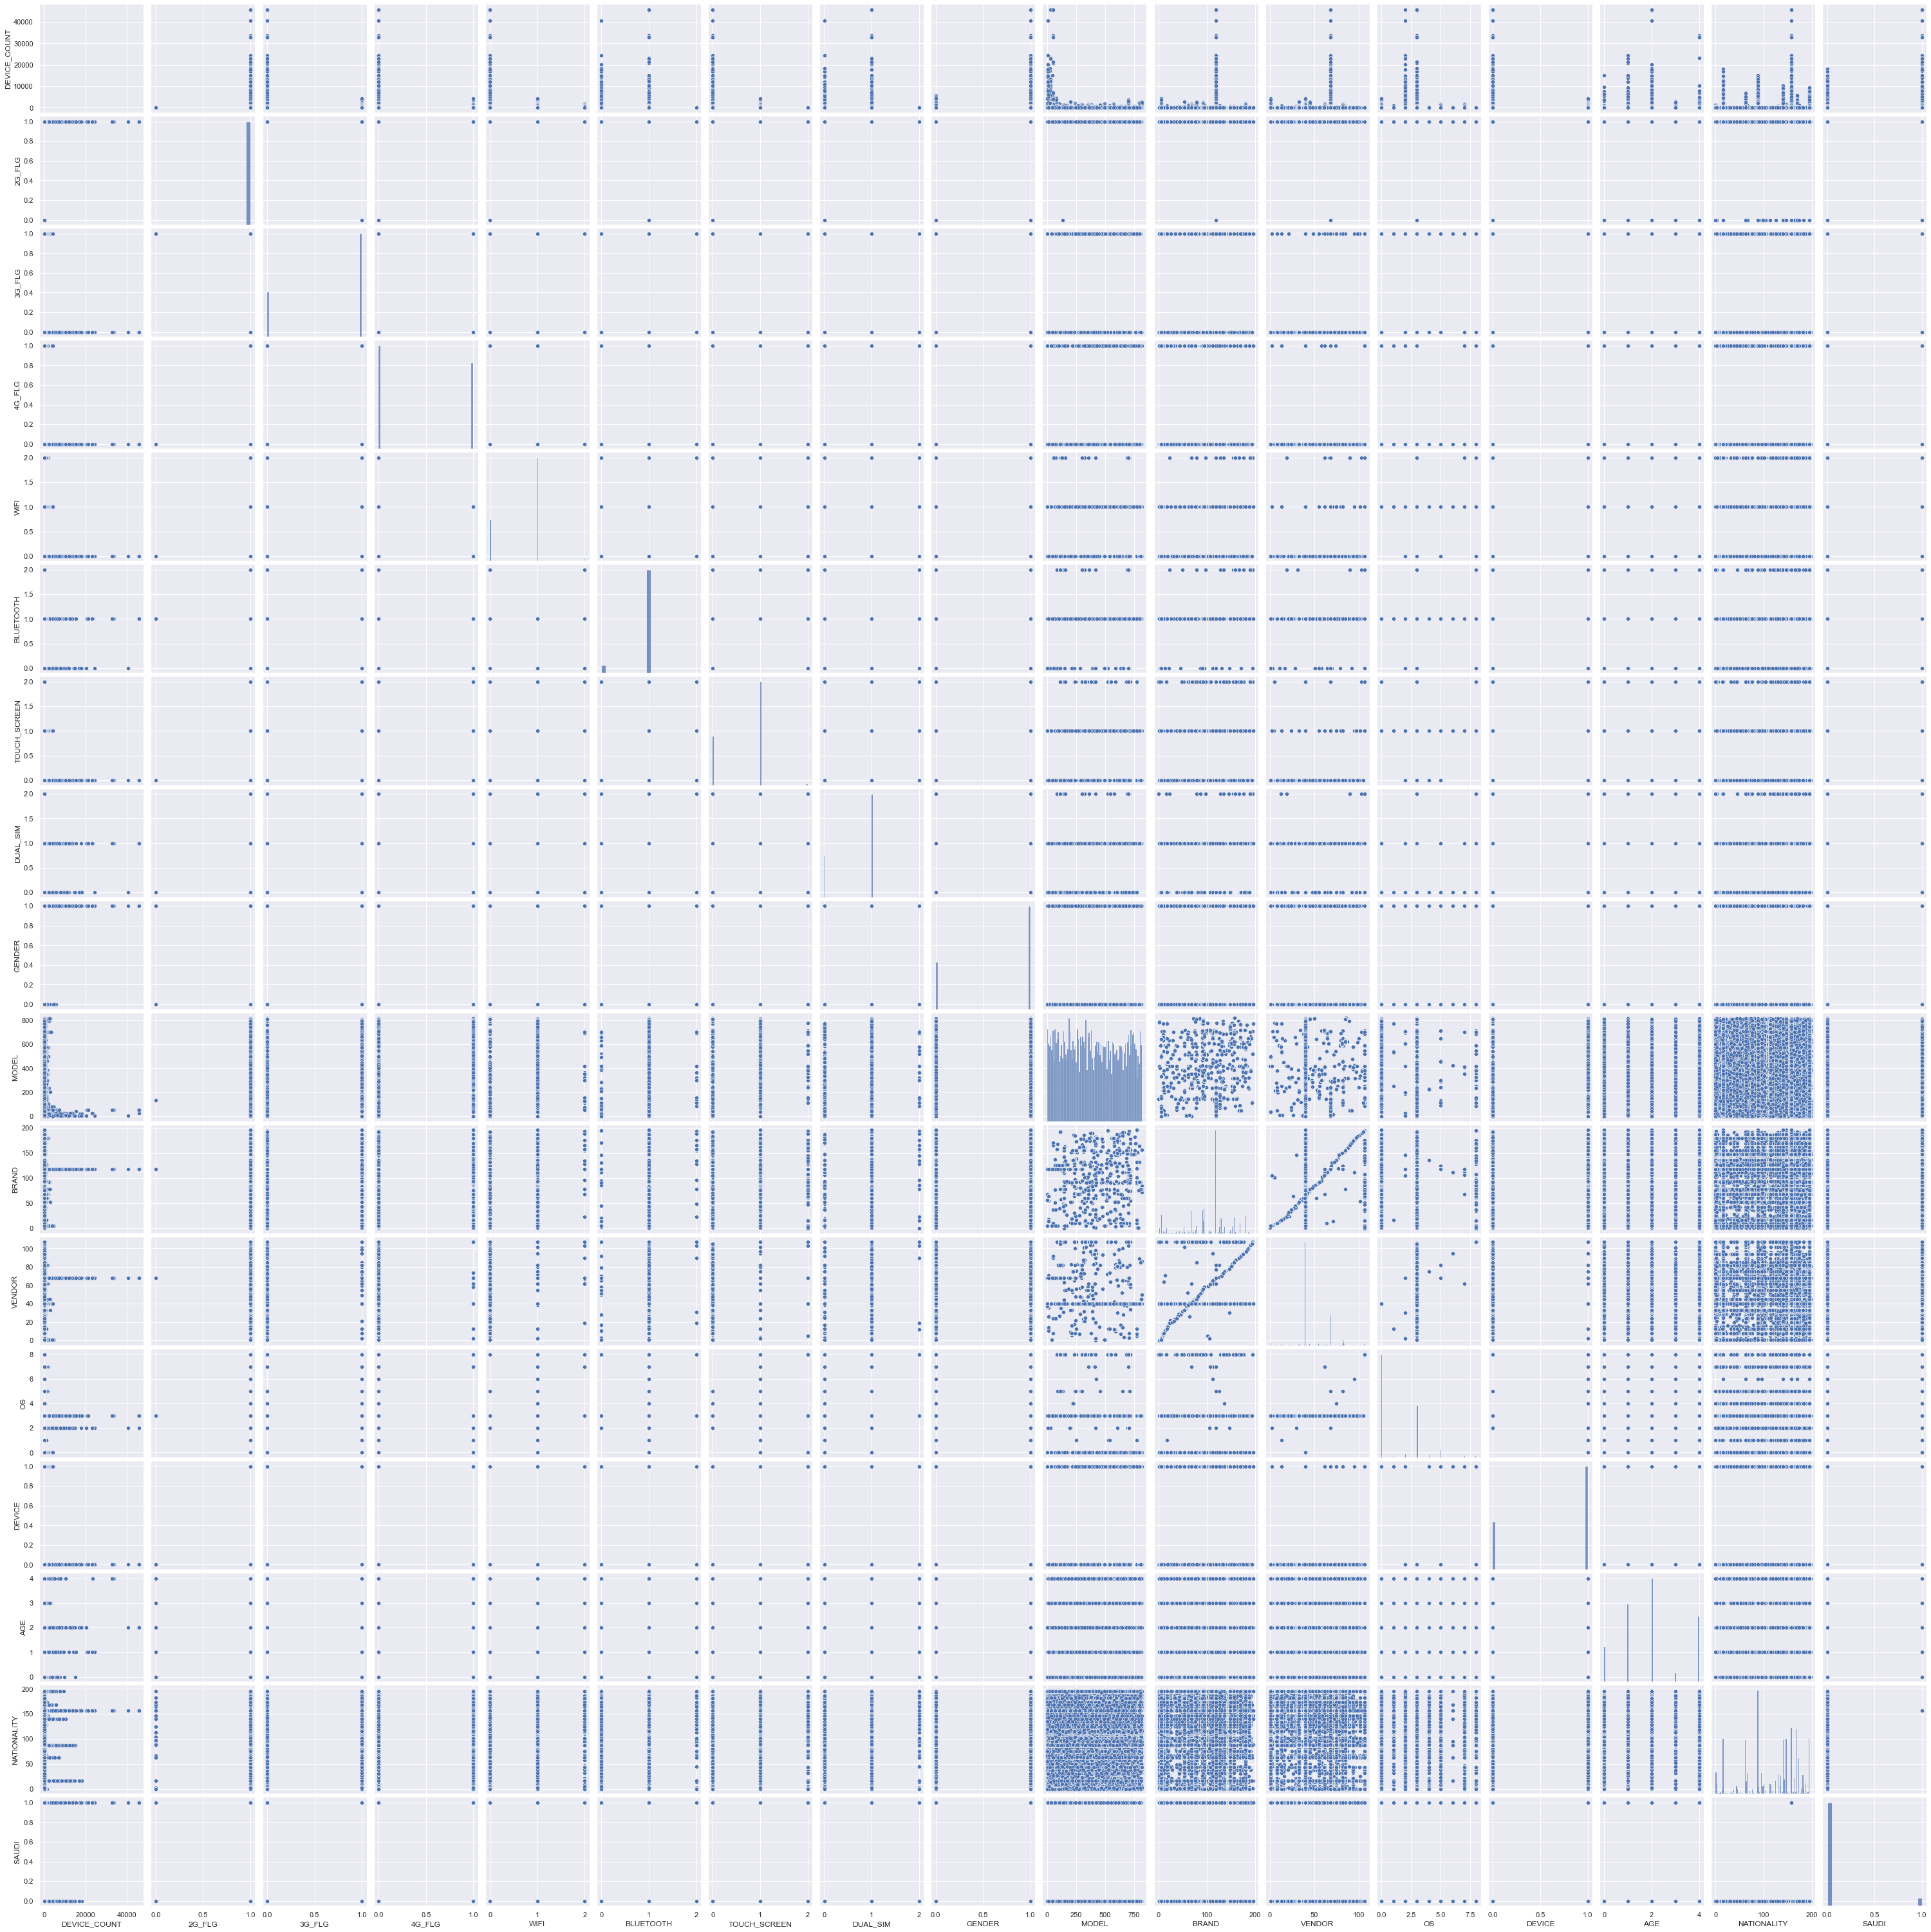

In [54]:
#pairplot --> for the stc data 
sns.pairplot(data = stc_d)

In [55]:
# drop values that greater than 15000 in DEVICE_COUNT
stc_d.drop(stc_d[stc_d['DEVICE_COUNT'] > 15000 ].index ,axis=0, inplace = True) 

In [62]:
# pinning for DEVICE_COUNT column and store it in performance variable  
        #Extremely poor --> 0-10
        #Poor           --> 10-50
        #Below average --> 50-100
        #Acceptable    --> 100 - 500
        #Good          --> 500 - 1000
        #Very good     --> 1000 - 5000
        #Excellent     --> 5000 - 10000
        #Exceptional   -->1000 - 15000
        
PERFORMANCE=pd.cut(stc_d["DEVICE_COUNT"],bins=[0,10,50,100,500,1000,5000,10000,15000],
                   labels=['Extremely poor','Poor','Below average','Acceptable','Good','Very good','Excellent','Exceptional'])

stc_d['PERFORMANCE'] = PERFORMANCE

In [60]:
# assigning some columns to the variable 'pair"
pair = stc_d[['MODEL','BRAND','VENDOR','DEVICE_COUNT','NATIONALITY','PERFORMANCE']]
pair

,MODEL,BRAND,VENDOR,DEVICE_COUNT,NATIONALITY,PERFORMANCE
0,510,68,40,9,168,Extremely poor
3,244,118,68,2,16,Extremely poor
5,231,186,40,1,88,Extremely poor
6,794,133,40,1,62,Extremely poor
8,488,68,40,21,173,Poor
...,...,...,...,...,...,...
1048568,289,133,73,2,169,Extremely poor
1048569,321,127,40,1,2,Extremely poor
1048572,707,118,68,16,173,Poor
1048573,266,68,40,7,16,Extremely poor


C:\Users\Amjad\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amjad\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amjad\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Amjad\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


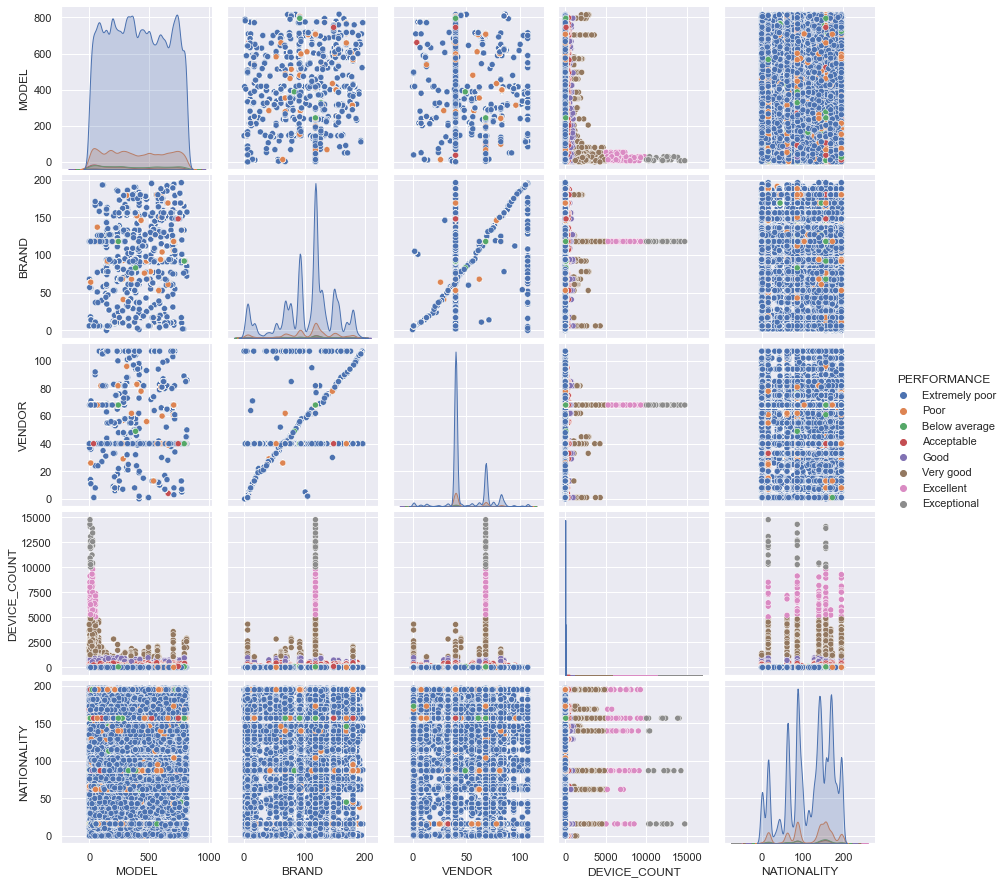

In [61]:
#pairplot ---> for the target : PERFORMANCE
sns.pairplot(data = pair , hue = 'PERFORMANCE')